In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from utils_attacker_lrt import likelihood_ratio_statistic_pool_haploid_approximate, \
    likelihood_ratio_test_threshold, likelihood_ratio_test
from utils_io import read_bitarrays
from utils_plot import plot_likelihood_ratio_statistics, plot_receiver_operating_characteristics_curve, plot_likelihood_ratio_test_hyper_num_snps

In [8]:
false_positive_rate = 0.05
num_snps_space = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

In [9]:
plot_dir = "../plots/lrt/pool/"
plot_name_lrt = "likelihood_ratio_statistics"
plot_title_lrt = "Likelihood Ratio Statistics: Pool"
plot_name_roc = "roc_curve"
plot_title_roc = "AUROC: Pool"

In [10]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

In [11]:
for num_snps in num_snps_space:
    print("=" * 25)
    print(f"Number of SNPs: {num_snps}")
    # Load the data
    genomes_pool = read_bitarrays("../data/test/In_Pop.pkl")[:, :num_snps]
    genomes_reference = read_bitarrays("../data/test/Not_In_Pop.pkl")[:, :num_snps]
    genomes = np.concatenate((genomes_pool, genomes_reference), axis=0)
    # Compute the labels
    labels_pool = np.ones(genomes_pool.shape[0], dtype=bool)
    labels_reference = np.zeros(genomes_reference.shape[0], dtype=bool)
    labels = np.concatenate((labels_pool, labels_reference), axis=0).astype(bool)
    # Compute the pool frequencies
    minor_allele_frequencies_pool = np.mean(genomes_pool, axis=0)
    minor_allele_frequencies_reference = np.mean(genomes_reference, axis=0)
    # Compute the likelihood ratio statistics
    likelihood_ratio_statistics_pool = likelihood_ratio_statistic_pool_haploid_approximate(
        target_genomes=genomes_pool,
        pool_frequencies=minor_allele_frequencies_pool,
        reference_frequencies=minor_allele_frequencies_reference)
    likelihood_ratio_statistics_reference = likelihood_ratio_statistic_pool_haploid_approximate(
        target_genomes=genomes_reference,
        pool_frequencies=minor_allele_frequencies_pool,
        reference_frequencies=minor_allele_frequencies_reference)
    likelihood_ratio_statistics = np.concatenate(
        (likelihood_ratio_statistics_pool, likelihood_ratio_statistics_reference), axis=0)
    # Compute the threshold
    threshold = likelihood_ratio_test_threshold(
        likelihood_ratio_statistics=likelihood_ratio_statistics,
        labels=labels,
        false_positive_rate=false_positive_rate)
    # Plot the likelihood ratio statistics
    inverted = np.mean(likelihood_ratio_statistics_pool) < np.mean(likelihood_ratio_statistics_reference)
    plot_likelihood_ratio_statistics(likelihood_ratio_statistics=likelihood_ratio_statistics,
                                     membership_labels=labels,
                                     threshold=threshold,
                                     inverted=inverted,
                                     title=plot_title_lrt,
                                     output_file=f"{plot_dir}{plot_name_lrt}_{num_snps}.png",
                                     show=False)
    # Compute the predictions
    predicted = likelihood_ratio_test(
        likelihood_ratio_statistics=likelihood_ratio_statistics,
        threshold=threshold,
        inverted=inverted)
    # Compute the evaluation metrics
    accuracy = accuracy_score(labels, predicted)
    precision = precision_score(labels, predicted)
    recall = recall_score(labels, predicted)
    f1 = f1_score(labels, predicted)
    roc_auc = roc_auc_score(labels, likelihood_ratio_statistics)
    # Append the evaluation metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    print(f"AUROC: {roc_auc:.2f}")
    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(labels, likelihood_ratio_statistics)
    plot_receiver_operating_characteristics_curve(true_positive_rates=tpr,
                                                    false_positive_rates=fpr,
                                                  auc=roc_auc,
                                                  title=plot_title_roc,
                                                  output_file=f"{plot_dir}{plot_name_roc}_{num_snps}.png",
                                                  show=False)

Number of SNPs: 10000
Accuracy: 0.71
Precision: 0.91
Recall: 0.48
F1: 0.63
AUROC: 0.85
Number of SNPs: 20000
Accuracy: 0.78
Precision: 0.92
Recall: 0.61
F1: 0.73
AUROC: 0.90
Number of SNPs: 30000
Accuracy: 0.85
Precision: 0.94
Recall: 0.74
F1: 0.83
AUROC: 0.93
Number of SNPs: 40000
Accuracy: 0.84
Precision: 0.94
Recall: 0.74
F1: 0.83
AUROC: 0.92
Number of SNPs: 50000
Accuracy: 0.87
Precision: 0.94
Recall: 0.79
F1: 0.86
AUROC: 0.94
Number of SNPs: 60000
Accuracy: 0.87
Precision: 0.94
Recall: 0.80
F1: 0.86
AUROC: 0.95
Number of SNPs: 70000
Accuracy: 0.87
Precision: 0.94
Recall: 0.79
F1: 0.86
AUROC: 0.95
Number of SNPs: 80000
Accuracy: 0.89
Precision: 0.94
Recall: 0.84
F1: 0.89
AUROC: 0.96
Number of SNPs: 90000
Accuracy: 0.90
Precision: 0.94
Recall: 0.85
F1: 0.89
AUROC: 0.96
Number of SNPs: 100000
Accuracy: 0.90
Precision: 0.94
Recall: 0.85
F1: 0.90
AUROC: 0.97


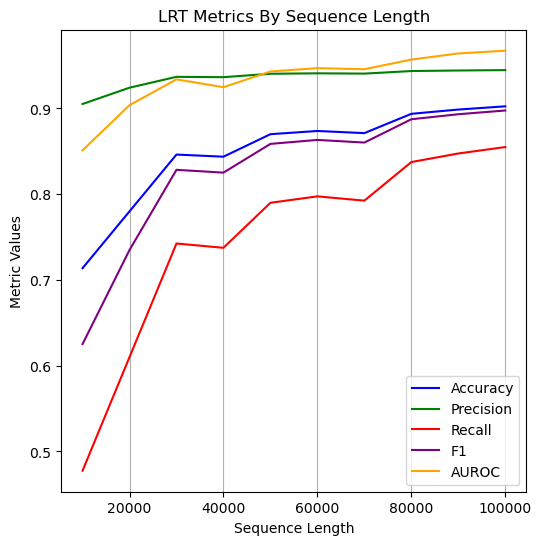

In [12]:
# Plot the evaluation metrics
plot_likelihood_ratio_test_hyper_num_snps(num_snps=num_snps_space,
                                          acc=accuracy_scores,
                                          prec=precision_scores,
                                          rec=recall_scores,
                                          f1=f1_scores,
                                          roc_auc=roc_auc_scores,
                                          output_file=f"{plot_dir}lrt_metrics_by_num_snps.png",
                                          show=True)